In [1]:
import jsonlines
import tqdm
from datetime import datetime
import nltk
nltk.download('stopwords')
import spacy
spacy.load('en')
from spacy.lang.en import English
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
parser = English()
en_stop = set(nltk.corpus.stopwords.words('english'))
from gensim import corpora
import pickle
import gensim

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rgopikrishna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
file = open('bowformat_articles.pickle', 'rb')
tokenizeddocs = pickle.load(file)
file.close()

In [3]:
listtokenarticles = list(tokenizeddocs.values())

In [4]:
dictionary = corpora.Dictionary(listtokenarticles)

In [5]:
corpus = [dictionary.doc2bow(text) for text in listtokenarticles]

In [6]:
with open('corput_bow.pickle', 'wb') as filehandle:
    pickle.dump(corpus, filehandle)

In [11]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('ldamodel/model5.gensim')

In [12]:
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.007*"year" + 0.007*"time" + 0.007*"like" + 0.005*"peopl"')
(1, '0.016*"year" + 0.013*"$" + 0.011*"market" + 0.008*"quarter"')
(2, '0.013*"health" + 0.012*"said" + 0.011*"peopl" + 0.009*"diseas"')
(3, '0.024*"said" + 0.017*"health" + 0.014*"peopl" + 0.013*"hospit"')
(4, '0.039*"china" + 0.023*"said" + 0.020*"wuhan" + 0.016*"chines"')


In [ ]:
LdaModel.load(temp_file)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

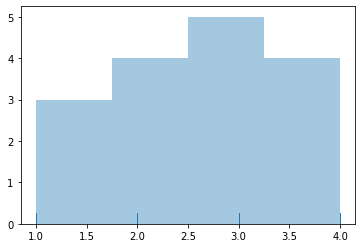

In [4]:
x = [1,4,1,2,3,4,3,4,2,3,2,1,3,2,3,4]
sns.distplot(x,kde=False, rug=True)

Text(0, 0.5, 'Counts of documents')

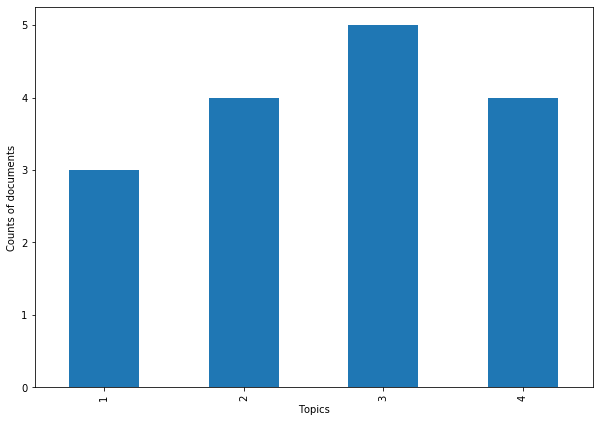

In [8]:
from collections import Counter
letter_counts = Counter(x)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.sort_index(inplace=True)
ax = df.plot(kind='bar',legend=False,figsize=(10,7))
ax.set_xlabel("Topics")
ax.set_ylabel("Counts of documents")